# DBSCAN Clustering Method

In [1]:

''' The example below contains:
    1. using the blobs feature 
    2. To visualize it and use it in some well recognized dataset, PCA has been done to iris dataset and plotted in 2d.
'''

# All the necessary import statements
# The DBSCAN implementation has been done with respect to using scikit's library

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Generate sample data
# for simplicity, the centres have been chosen and samples made with standard deviation around the centre
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [3]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=8).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [7]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)

print('Estimated number of noise points: %d' % n_noise_)

# A clustering result satisfies homogeneity if all 
# of its clusters contain only data points which are members of a single class.
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

# A clustering result satisfies completeness if all the data points
# that are members of a given class are elements of the same cluster.
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))



Estimated number of clusters: 3
Estimated number of noise points: 13
Homogeneity: 0.948
Completeness: 0.892


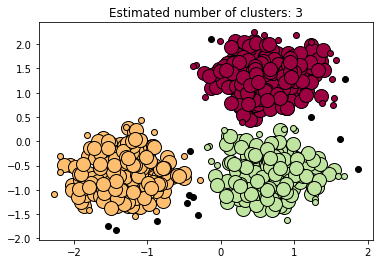

In [8]:

import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()

In [10]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.7,min_samples=6)

In [11]:
dbscan


DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=6, n_jobs=None, p=None)

In [12]:
dbscan.fit(iris.data)

DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=6, n_jobs=None, p=None)

In [13]:
dbscan.labels_


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

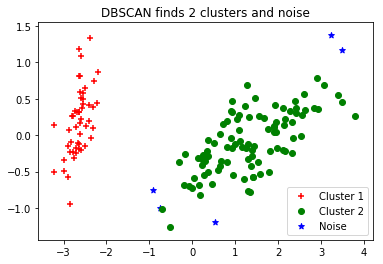

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as pl
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
pl.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Noise'])
pl.title('DBSCAN finds 2 clusters and noise')
pl.show()

Parameter estimation:

The parameter estimation is a problem for every data mining task. To choose good parameters we need to understand how they are used and have at least a basic previous knowledge about the data set that will be used.

    eps: if the eps value chosen is too small, a large part of the data will not be clustered. It will be considered outliers because don’t satisfy the number of points to create a dense region. On the other hand, if the value that was chosen is too high, clusters will merge and the majority of objects will be in the same cluster. The eps should be chosen based on the distance of the dataset (we can use a k-distance graph to find it), but in general small eps values are preferable.

    minPoints: As a general rule, a minimum minPoints can be derived from a number of dimensions (D) in the data set, as minPoints ≥ D + 1. Larger values are usually better for data sets with noise and will form more significant clusters. The minimum value for the minPoints must be 3, but the larger the data set, the larger the minPoints value that should be chosen.
        

As a rule of thumb, minPts = 2·dim can be used,[6] but it may be necessary to choose larger values for very large data, for noisy data or for data that contains many duplicates
